In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import commentjson as json

class ReadJson(object):
    def __init__(self, filename):
        #print('Read the runprops.txt file')
        self.data = json.load(open(filename))
    def outProps(self):
        return self.data

In [255]:
astdys = pd.read_csv('data_files/astdys_tnos.csv')
#print(astdys)
drop_col = []
nep_approach =np.zeros(len(astdys))
resonant = np.zeros(len(astdys))
for i in range(len(astdys)):
    name = astdys['Name'].values[i]
    if i % 100 == 0:
        print(i)
    series = pd.read_csv('TNOs/'+name+'/series.csv',index_col=0)
        
    getData = ReadJson('TNOs/'+name+'/runprops.txt')
    runprops = getData.outProps()
    #print(series)
    if series['ecc'].values[-1] >= 0.5:
        drop_col.append(i)
    elif series['a'].values[-1] >= 100:
        drop_col.append(i)
    if runprops.get('Close_Neptune') == True:
        nep_approach[i] = 1
    else:
        nep_approach[i] = 0
        
    if astdys['a(AU)'][i] < 39.7 and astdys['a(AU)'][i] > 39.1:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 44.0 and astdys['a(AU)'][i] > 43.4:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 48.1 and astdys['a(AU)'][i] > 47.5:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 30.3 and astdys['a(AU)'][i] > 29.7:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 42.5 and astdys['a(AU)'][i] > 41.9:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 36.8 and astdys['a(AU)'][i] > 36.2:
        resonant[i] = 1
    elif astdys['a(AU)'][i] < 55.7 and astdys['a(AU)'][i] > 55.1:
        resonant[i] = 1

ind = np.where(prop_elem['calc_ecc'] > 0.4)
rescol = np.delete(resonant,ind[0],None)*0.5
print(astdys['Name'].values[drop_col])
print(nep_approach[787])

0
100
200
300
400
500
600
700
800
900
1000
1100
['33340' '119067' '119069' '307463' '341520' '385571' '385695' '438028'
 '450265' '469362' '470308' '2000 FB8' '2002 CE251' '2002 PU170'
 '2004 EJ96' '2004 MS8' '2005 EX318' '2005 EZ300' '2005 JK186' '2005 TN53'
 '2006 TP130' '2009 JZ18' '2010 JK124' '2010 TJ182' '2010 TT191'
 '2010 VX224' '2011 HM102' '2011 SO277' '2011 UC411' '2011 UD411'
 '2011 VJ24' '2013 FD28' '2013 GU136' '2014 FB62' '2014 JT80' '2014 QO441'
 '2014 WG510' '2014 WQ510' '2014 YJ50']
0.0


In [80]:
for i in range(len(astdys)):
    name = astdys['Name'].values[i]
    if i % 100 == 0:
        print(i)
    getData = ReadJson('TNOs/'+name+'/runprops.txt')
    runprops = getData.outProps()
    #print(series)
    if runprops.get('3_Hill_Neptune') == True:
        nep_approach[i] = 1
    else:
        nep_approach[i] = 0

0
100
200
300
400
500
600
700
800
900
1000
1100


In [81]:
print(len(nep_approach[np.where(nep_approach == 1)]))

close_ind = np.where(nep_approach == 1)[0]
far_ind = np.where(nep_approach == 0)[0]
#print(close_ind, far_ind)

247


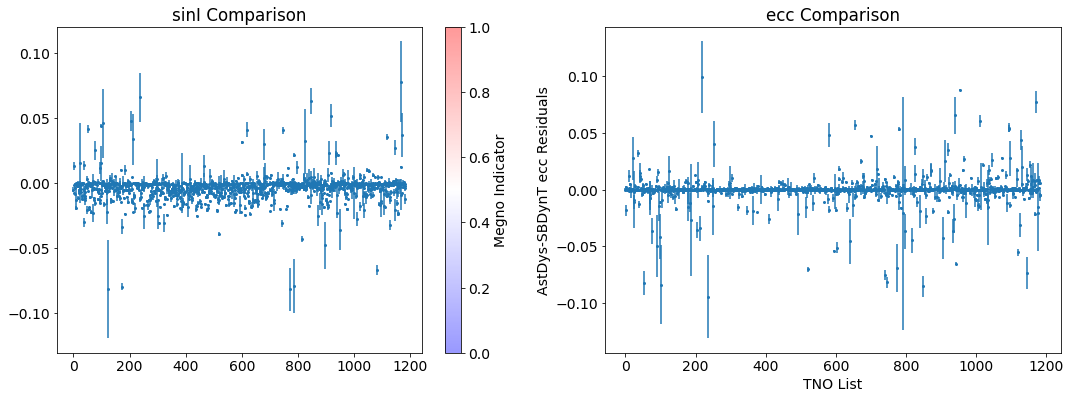

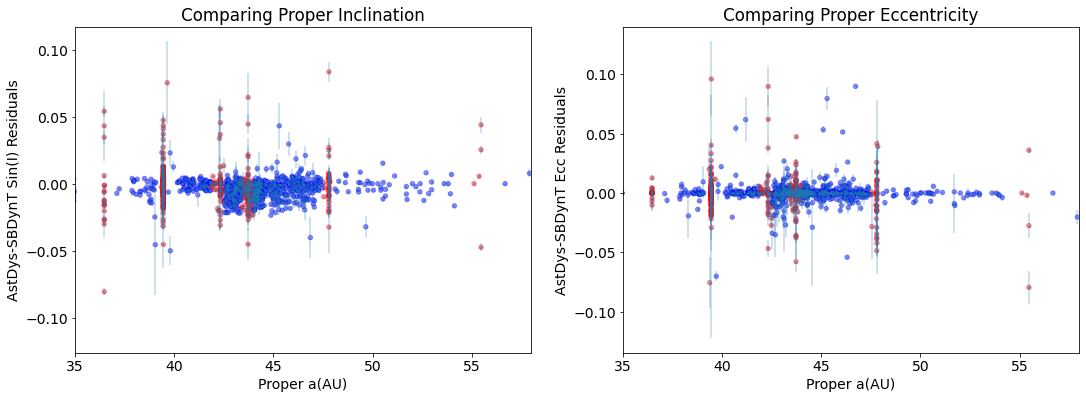

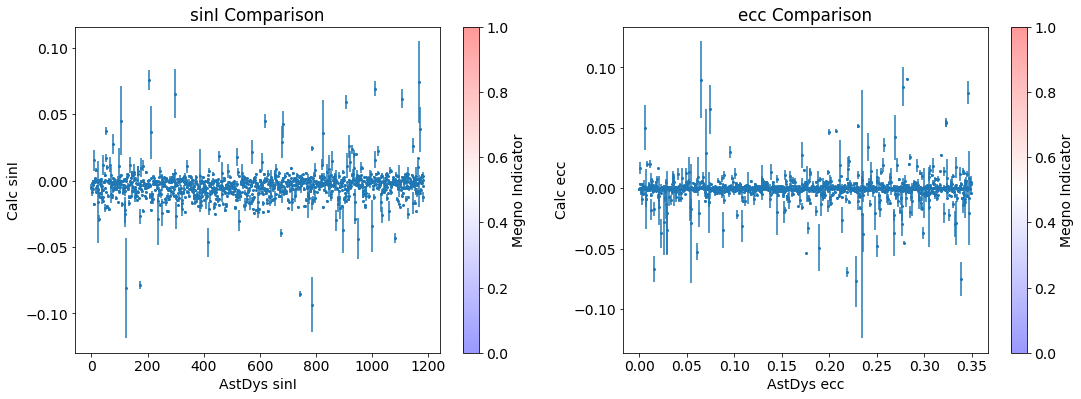

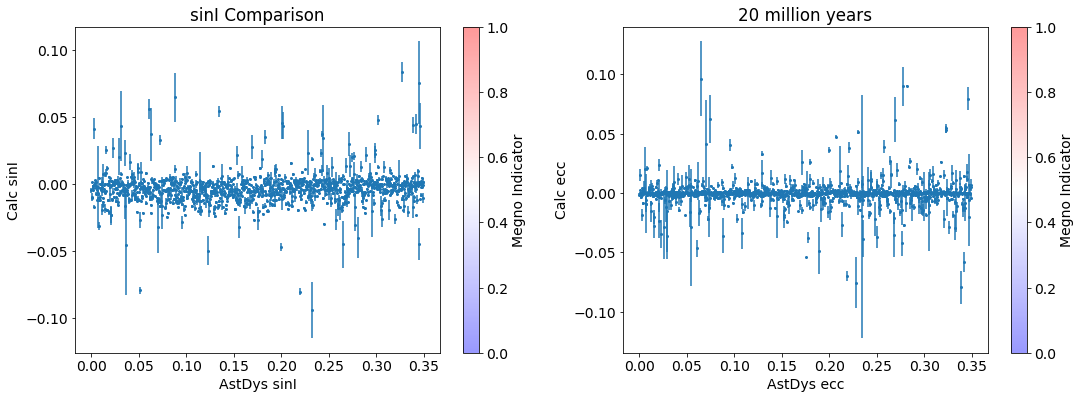

"\ndata = range(0,len(prop_elem))\ndata=np.array(data)/len(prop_elem)*0.7\n#plt.scatter(data,data,s=0.1)\nfig,ax = plt.subplots(1,2,figsize=(18,6))\nax0 = ax[0].scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=10,c=prop_elem['megno'])\n#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['megno'])\n\nfig.colorbar(ax0,ax=ax[0],label='Megno Indicator')\nax[0].set_title('sinI Comparison')\nax[0].set_xlabel('AstDys sinI')\nax[0].set_ylabel('Calc sinI')\n\ndata = range(0,len(prop_elem))\ndata=np.array(data)/len(prop_elem)*0.35\nax1 = ax[1].errorbar(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=10,c=prop_elem['megno'])\n\nfig.colorbar(ax0,ax=ax[1],label='Megno Indicator')\n#plt.gca().set_aspect('equal')\nax[1].set_title('ecc Comparison')\nax[1].set_xlabel('AstDys ecc')\nax[1].set_ylabel('Calc ecc')\n#plt.gca().set_aspect('equal')\nplt.show()\n\ndata = range(0,len(prop_elem))\ndata=np.array(data)/len(prop_elem)*0.7\n#plt.scatter(data,data,s=0.1)\nfig,ax = plt.subplo

In [301]:
import matplotlib.cm as cm

prop_elem = pd.read_csv('data_files/prop_elem_tnos_wh.csv')
ind = np.where(prop_elem['calc_ecc'] > 0.4)
prop_elem5 = pd.read_csv('data_files/prop_elem_tnos_5mil.csv')
prop_elem10 = pd.read_csv('data_files/prop_elem_tnos_10mil.csv')
prop_elem20 = pd.read_csv('data_files/prop_elem_tnos_20mil.csv')
prop_elem1 = pd.read_csv('data_files/prop_elem_tnos_1mil.csv')
prop_elem2_5 = pd.read_csv('data_files/prop_elem_tnos_2_5mil.csv')
spread = pd.read_csv('data_files/astdys_spread.csv')
rescol = np.delete(resonant, ind, None)

prop_elem5 = prop_elem5.drop(ind[0])
prop_elem10 = prop_elem10.drop(ind[0])
prop_elem20 = prop_elem20.drop(ind[0])
prop_elem = prop_elem.drop(ind[0])
prop_elem1 = prop_elem1.drop(ind[0])
prop_elem2_5 = prop_elem2_5.drop(ind[0])
spread = spread.drop(ind[0])
astdys2 = astdys.drop(ind[0])

data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
#print(prop_elem['calc_sinI'][np.where(prop_elem['calc_sinI'] >= 0.4)])
ax[0].errorbar(data,prop_elem['ast_sinI']-prop_elem['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
#ax0=ax[0].scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[1].set_ylabel('AstDys-SBDynT sinI Residuals')
ax[1].set_xlabel('TNO List')

ax[1].errorbar(data,prop_elem['ast_ecc']-prop_elem['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
#ax[1].scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=20,c=prop_elem['megno'])

ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('AstDys-SBDynT ecc Residuals')
ax[1].set_xlabel('TNO List')
#plt.gca().set_aspect('equal')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
plt.rcParams.update({'font.size': 14})
resind = np.where(rescol == 0.5)
nonresind = np.where(rescol == 0)
#print(resind[0], nonresind[0])

ax[0].errorbar(astdys2['a(AU)'],prop_elem5['ast_sinI']-prop_elem5['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2,alpha=0.3)
#print(prop_elem20['ast_sinI'][nonresind[0]])
ax[0].scatter(astdys2['a(AU)'],prop_elem5['ast_sinI']-prop_elem5['calc_sinI'],cmap = cm.bwr,s=20,c=rescol,alpha=0.4)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('Comparing Proper Inclination')
ax[0].set_ylabel('AstDys-SBDynT Sin(I) Residuals')
ax[0].set_xlabel('Proper a(AU)')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
#data = range(0,len(prop_elem5))
#data=np.array(data)/len(prop_elem5)*0.35
ax[1].errorbar(astdys2['a(AU)'],prop_elem5['ast_ecc']-prop_elem5['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2,alpha=0.3)
ax0 = ax[1].scatter(astdys2['a(AU)'],prop_elem5['ast_ecc']-prop_elem5['calc_ecc'],cmap = cm.bwr,s=20,c=rescol,alpha=0.4)
#fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('Comparing Proper Eccentricity')
ax[1].set_ylabel('AstDys-SBDynT Ecc Residuals')
ax[1].set_xlabel('Proper a(AU)')
#plt.gca().set_aspect('equal')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(data,prop_elem10['ast_sinI']-prop_elem10['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
#ax0=ax[0].scatter(prop_elem10['ast_sinI'],prop_elem10['calc_sinI'],s=20,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')

data = range(0,len(prop_elem10))
data=np.array(data)/len(prop_elem10)*0.35
ax[1].errorbar(data,prop_elem10['ast_ecc']-prop_elem10['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
#ax0 = ax[1].scatter(prop_elem10['ast_ecc'],prop_elem10['calc_ecc'],s=20,c=prop_elem['megno'])
fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
#plt.gca().set_aspect('equal')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(data,prop_elem5['ast_sinI']-prop_elem5['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
#ax0=ax[0].scatter(prop_elem20['ast_sinI'],prop_elem20['calc_sinI'],s=20,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')
data = range(0,len(prop_elem20))
data=np.array(data)/len(prop_elem20)*0.35
ax[1].errorbar(data,prop_elem5['ast_ecc']-prop_elem5['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
#ax0 = ax[1].scatter(prop_elem20['ast_ecc'],prop_elem20['calc_ecc'],s=20,c=prop_elem['megno'])
fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
plt.title('20 million years')
#plt.gca().set_aspect('equal')
plt.show()
'''
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
#plt.scatter(data,data,s=0.1)
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0 = ax[0].scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=10,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['megno'])

fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
ax1 = ax[1].errorbar(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=10,c=prop_elem['megno'])

fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
#plt.scatter(data,data,s=0.1)
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0 = ax[0].scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=10,c=prop_elem['lyapunov'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])

fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
ax1 = ax[1].errorbar(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=10,c=prop_elem['lyapunov'])

fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
#plt.gca().set_aspect('equal')
plt.show()
'''

[ 363  911   17   23   63  182  362  571  706  719  773  815  938  966
 1028 1108 1112 1164 1184]


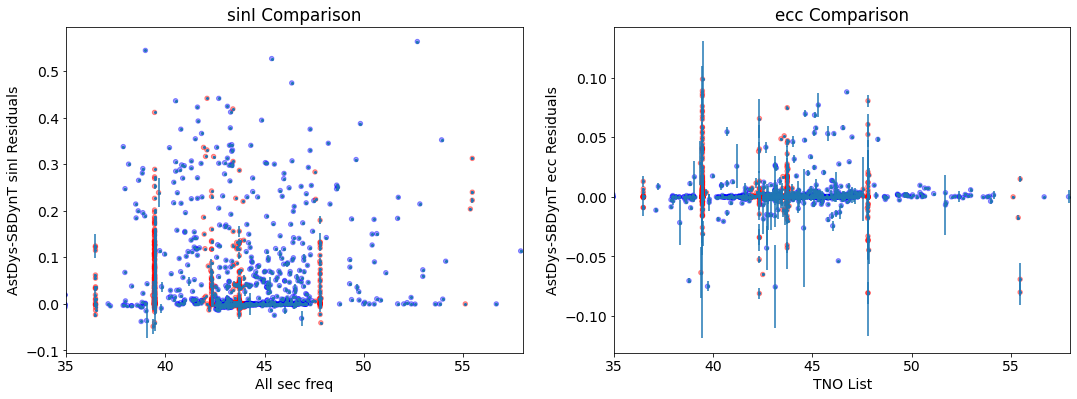

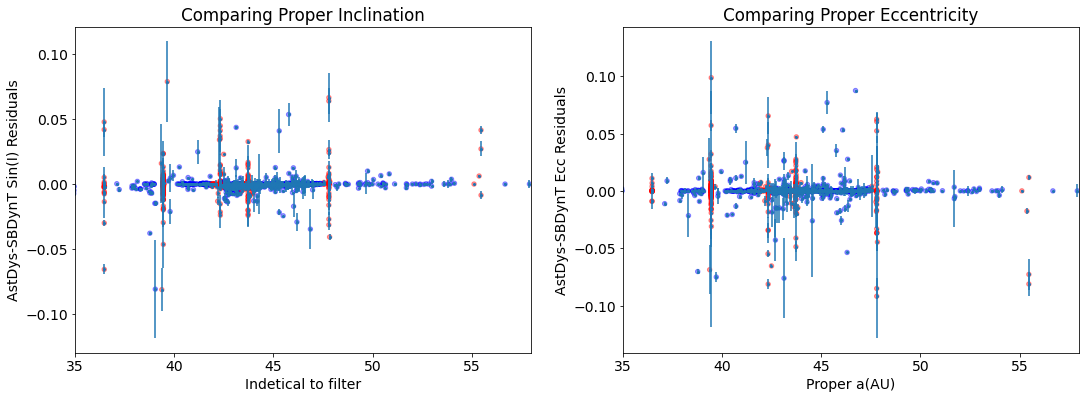

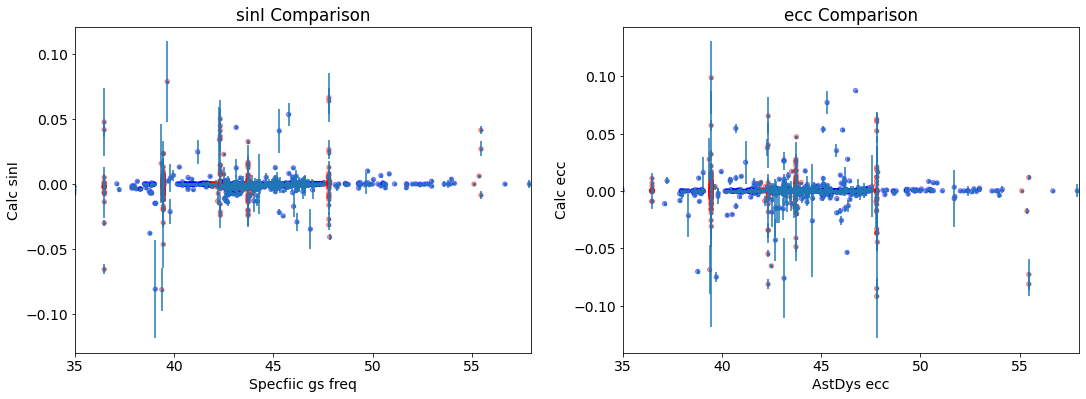

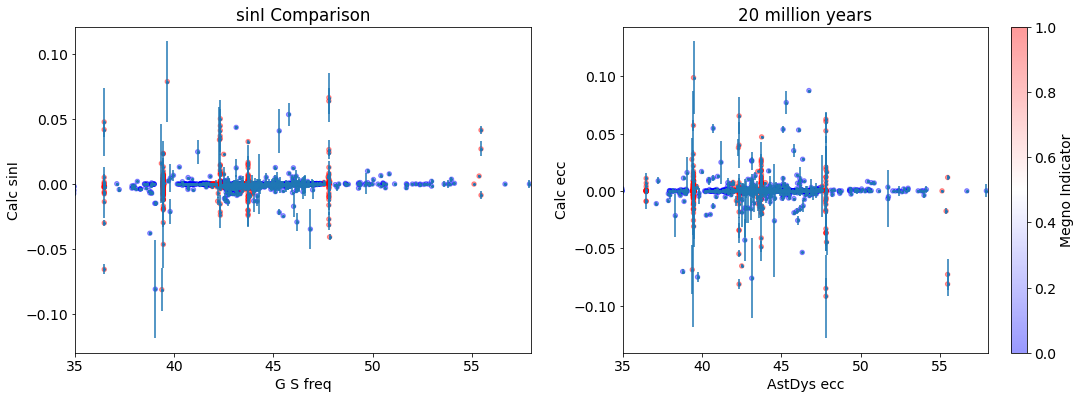

In [325]:
import matplotlib.cm as cm

prop_elem = pd.read_csv('data_files/prop_elem_tnos_sec_all.csv')
prop_elem5 = pd.read_csv('data_files/prop_elem_tnos_sec_g_s.csv')
prop_elem10 = pd.read_csv('data_files/prop_elem_tnos_sec_gs_spec.csv')
prop_elem20 = pd.read_csv('data_files/prop_elem_tnos_sec_identical.csv')
spread = pd.read_csv('data_files/astdys_spread.csv')
rescol = np.copy(resonant)

'''
ind = np.where((prop_elem['calc_ecc']-prop_elem['ast_ecc']) > 0.1)
ind2 = np.where((prop_elem['calc_ecc']-prop_elem['ast_ecc']) < -0.1)
ind = ind[0]
ind2 = ind2[0]
ind = np.concatenate((ind,ind2))
rescol = np.delete(rescol, ind, None)
prop_elem5 = prop_elem5.drop(ind)
prop_elem10 = prop_elem10.drop(ind)
prop_elem20 = prop_elem20.drop(ind)
prop_elem = prop_elem.drop(ind)
spread = spread.drop(ind)
astdys2 = astdys.drop(ind)
print(ind)
'''
data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(astdys2['a(AU)'],prop_elem['ast_sinI']-prop_elem['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
ax[0].scatter(astdys2['a(AU)'],prop_elem['ast_sinI']-prop_elem['calc_sinI'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('AstDys-SBDynT sinI Residuals')
ax[0].set_xlabel('All sec freq')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
ax[1].errorbar(astdys2['a(AU)'],prop_elem['ast_ecc']-prop_elem['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
ax[1].scatter(astdys2['a(AU)'],prop_elem['ast_ecc']-prop_elem['calc_ecc'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('AstDys-SBDynT ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
plt.rcParams.update({'font.size': 14})
resind = np.where(rescol == 0.5)
nonresind = np.where(rescol == 0)
#print(resind[0], nonresind[0])

ax[0].errorbar(astdys2['a(AU)'],prop_elem20['ast_sinI']-prop_elem20['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
#print(prop_elem20['ast_sinI'][nonresind[0]])
ax[0].scatter(astdys2['a(AU)'],prop_elem20['ast_sinI']-prop_elem20['calc_sinI'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('Comparing Proper Inclination')
ax[0].set_ylabel('AstDys-SBDynT Sin(I) Residuals')
ax[0].set_xlabel('Indetical to filter')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
#data = range(0,len(prop_elem5))
#data=np.array(data)/len(prop_elem5)*0.35
ax[1].errorbar(astdys2['a(AU)'],prop_elem20['ast_ecc']-prop_elem20['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
ax0 = ax[1].scatter(astdys2['a(AU)'],prop_elem20['ast_ecc']-prop_elem20['calc_ecc'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('Comparing Proper Eccentricity')
ax[1].set_ylabel('AstDys-SBDynT Ecc Residuals')
ax[1].set_xlabel('Proper a(AU)')
#plt.gca().set_aspect('equal')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(astdys2['a(AU)'],prop_elem10['ast_sinI']-prop_elem10['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
ax[0].scatter(astdys2['a(AU)'],prop_elem10['ast_sinI']-prop_elem10['calc_sinI'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#ax0=ax[0].scatter(prop_elem10['ast_sinI'],prop_elem10['calc_sinI'],s=20,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('Specfiic gs freq')
ax[0].set_ylabel('Calc sinI')

data = range(0,len(prop_elem10))
data=np.array(data)/len(prop_elem10)*0.35
ax[1].errorbar(astdys2['a(AU)'],prop_elem10['ast_ecc']-prop_elem10['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
ax0 = ax[1].scatter(astdys2['a(AU)'],prop_elem10['ast_ecc']-prop_elem10['calc_ecc'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#ax0 = ax[1].scatter(prop_elem10['ast_ecc'],prop_elem10['calc_ecc'],s=20,c=prop_elem['megno'])
#fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
#plt.gca().set_aspect('equal')
plt.show()

fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(astdys2['a(AU)'],prop_elem5['ast_sinI']-prop_elem5['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
ax[0].scatter(astdys2['a(AU)'],prop_elem5['ast_sinI']-prop_elem5['calc_sinI'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#ax0=ax[0].scatter(prop_elem20['ast_sinI'],prop_elem20['calc_sinI'],s=20,c=prop_elem['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('G S freq')
ax[0].set_ylabel('Calc sinI')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
data = range(0,len(prop_elem20))
data=np.array(data)/len(prop_elem20)*0.35
ax[1].errorbar(astdys2['a(AU)'],prop_elem5['ast_ecc']-prop_elem5['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
ax0 = ax[1].scatter(astdys2['a(AU)'],prop_elem5['ast_ecc']-prop_elem5['calc_ecc'],cmap = cm.bwr,c=rescol,s=20,alpha=0.4)
#ax0 = ax[1].scatter(prop_elem20['ast_ecc'],prop_elem20['calc_ecc'],s=20,c=prop_elem['megno'])
fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
plt.title('20 million years')
#plt.gca().set_aspect('equal')
plt.show()

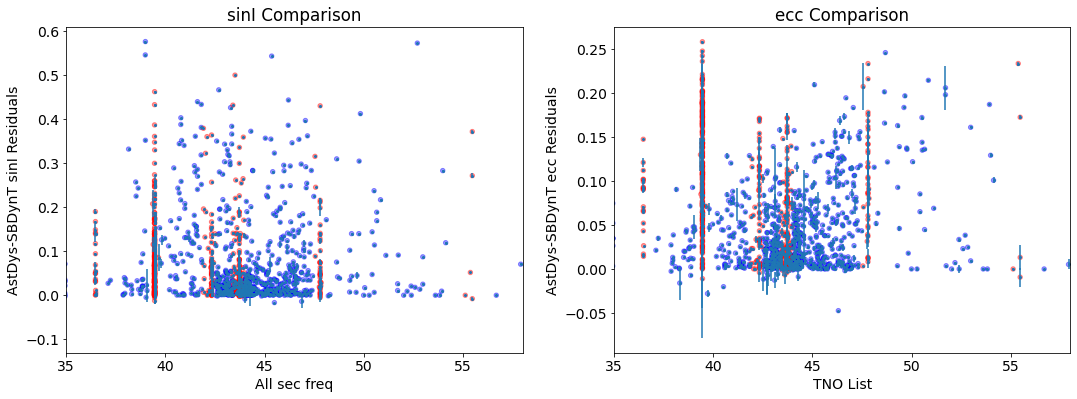

In [333]:
prop_elem = pd.read_csv('data_files/prop_elem_tnos_singlefreq.csv')
astdys2 = pd.read_csv('data_files/astdys_tnos.csv')
spread = pd.read_csv('data_files/astdys_spread.csv')
data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].errorbar(astdys2['a(AU)'],prop_elem['ast_sinI']-prop_elem['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=2)
ax[0].scatter(astdys2['a(AU)'],prop_elem['ast_sinI']-prop_elem['calc_sinI'],cmap = cm.bwr,c=resonant,s=20,alpha=0.4)
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('AstDys-SBDynT sinI Residuals')
ax[0].set_xlabel('All sec freq')
ax[0].set_xlim(35,58)
ax[1].set_xlim(35,58)
ax[1].errorbar(astdys2['a(AU)'],prop_elem['ast_ecc']-prop_elem['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=2)
ax[1].scatter(astdys2['a(AU)'],prop_elem['ast_ecc']-prop_elem['calc_ecc'],cmap = cm.bwr,c=resonant,s=20,alpha=0.4)
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('AstDys-SBDynT ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()

0      -0.000706
1       0.000099
2      -0.001312
3       0.014018
4      -0.000691
          ...   
1181    0.001774
1182   -0.000462
1183    0.001044
1184   -0.010368
1185   -0.002166
Length: 1186, dtype: float64


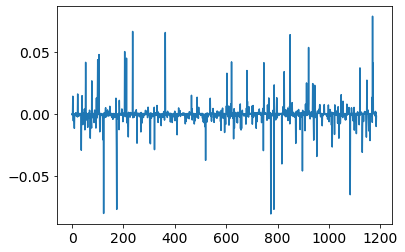

In [295]:
print(prop_elem20['ast_sinI']-prop_elem20['calc_sinI'])
plt.plot(prop_elem20['ast_sinI']-prop_elem20['calc_sinI'])

437 747
1       0.101916
2       0.033014
3       0.224428
4       0.059918
5       0.085714
          ...   
1155    0.162387
1156    0.304697
1167    0.462819
1175    0.192655
1181    0.268945
Name: ast_sinI, Length: 437, dtype: float64


KeyError: '[363, 911] not in index'

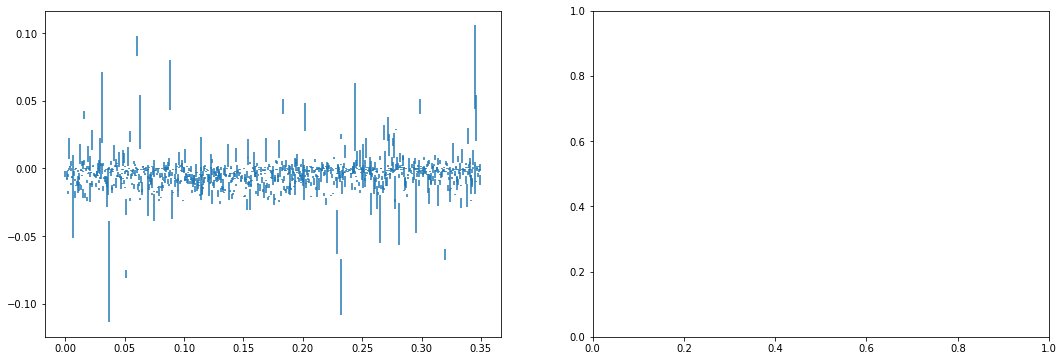

In [244]:
fig,ax = plt.subplots(1,2,figsize=(18,6))
resind = np.where(rescol == 1)
nonresind = np.where(rescol == 0)
print(len(resind[0]), len(nonresind[0]))
print(prop_elem20['ast_sinI'][resind[0]])
#print(resind[0], nonresind[0])

ax[0].errorbar(data,prop_elem20['ast_sinI']-prop_elem20['calc_sinI'],yerr=spread['sinI'],xerr=np.zeros(len(prop_elem)),fmt='o',ls=None,markersize=0)
ax[0].scatter(data[nonresind[0]],prop_elem20['ast_sinI'][nonresind[0]]-prop_elem20['calc_sinI'][nonresind[0]],cmap = cm.bwr,s=20,c=rescol[nonresind[0]])
ax[0].scatter(data[resind[0]],prop_elem20['ast_sinI'][resind[0]]-prop_elem20['calc_sinI'][resind[0]],cmap = cm.bwr,s=20,c=rescol[resind[0]])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('AstDys-SBDynT sinI Residuals')
ax[0].set_xlabel('TNO List')
#data = range(0,len(prop_elem5))
#data=np.array(data)/len(prop_elem5)*0.35
ax[1].errorbar(data,prop_elem20['ast_ecc']-prop_elem20['calc_ecc'],yerr=spread['e'],xerr=np.zeros(len(prop_elem)),ls=None,fmt='o',markersize=0)
ax0 = ax[1].scatter(data,prop_elem20['ast_ecc']-prop_elem20['calc_ecc'],cmap = cm.bwr,s=20,c=rescol)
#fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('AstDys-SBDynT ecc Residuals')
ax[1].set_xlabel('TNO List')
#plt.gca().set_aspect('equal')
plt.show()

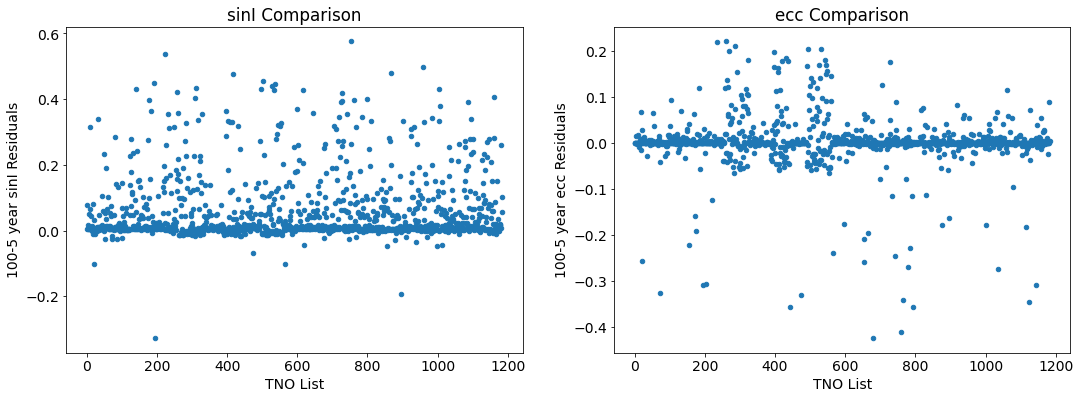

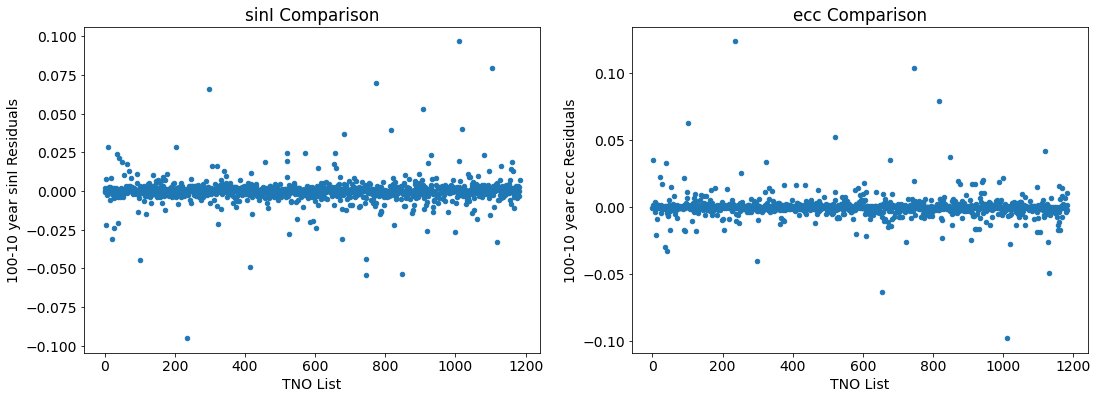

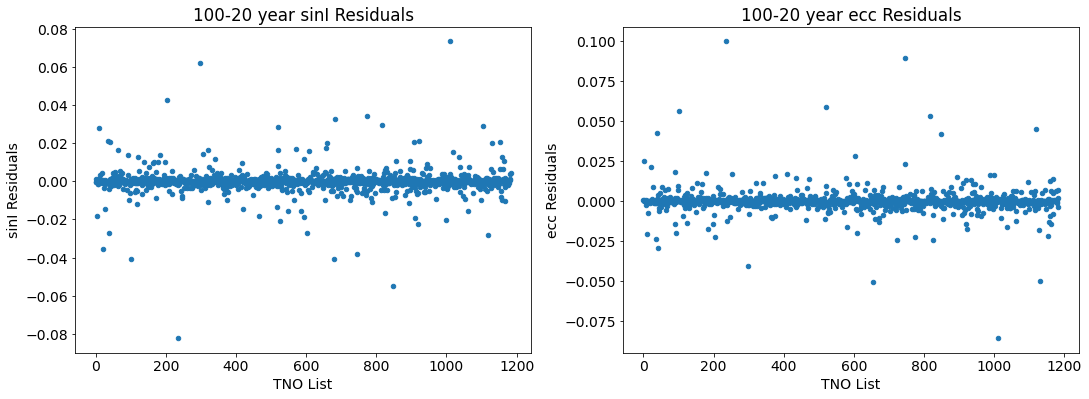

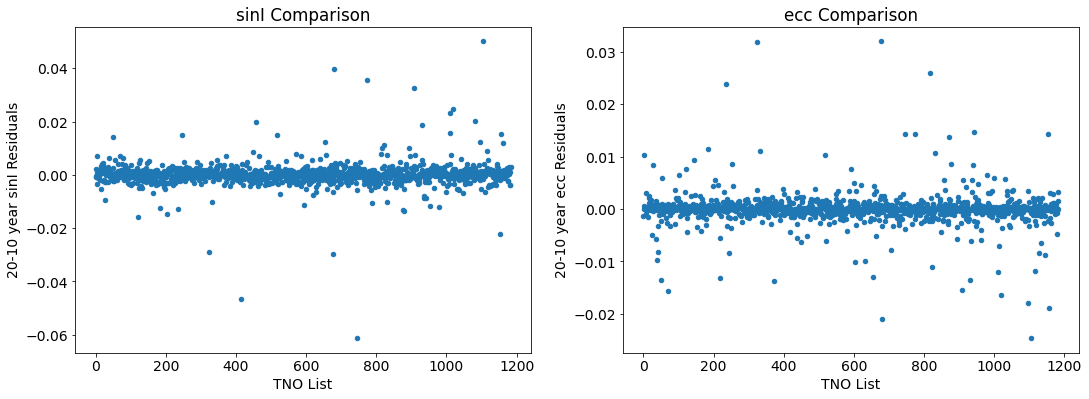

In [282]:
prop_elem = pd.read_csv('data_files/prop_elem_tnos_wh.csv')
ind = np.where(prop_elem['calc_ecc'] > 0.4)
prop_elem5 = pd.read_csv('data_files/prop_elem_tnos_sec.csv')
prop_elem10 = pd.read_csv('data_files/prop_elem_tnos_10mil.csv')
prop_elem20 = pd.read_csv('data_files/prop_elem_tnos_20mil.csv')
prop_elem1 = pd.read_csv('data_files/prop_elem_tnos_1mil.csv')
prop_elem2_5 = pd.read_csv('data_files/prop_elem_tnos_2_5mil.csv')
rescol = np.delete(resonant,ind[0],None)*0.5
spread = pd.read_csv('data_files/astdys_spread.csv')


prop_elem5 = prop_elem5.drop(ind[0])
prop_elem10 = prop_elem10.drop(ind[0])
prop_elem20 = prop_elem20.drop(ind[0])
prop_elem = prop_elem.drop(ind[0])
prop_elem1 = prop_elem1.drop(ind[0])
prop_elem2_5 = prop_elem2_5.drop(ind[0])
spread = spread.drop(ind[0])

data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0=ax[0].scatter(data,prop_elem['calc_sinI']-prop_elem5['calc_sinI'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('100-5 year sinI Residuals')
ax[0].set_xlabel('TNO List')

ax0=ax[1].scatter(data,prop_elem['calc_ecc']-prop_elem5['calc_ecc'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('100-5 year ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()

#=========================================================================================
data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0=ax[0].scatter(data,prop_elem['calc_sinI']-prop_elem10['calc_sinI'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('100-10 year sinI Residuals')
ax[0].set_xlabel('TNO List')

ax0=ax[1].scatter(data,prop_elem['calc_ecc']-prop_elem10['calc_ecc'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('100-10 year ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()

#=========================================================================================
data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0=ax[0].scatter(data,prop_elem['calc_sinI']-prop_elem20['calc_sinI'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('100-20 year sinI Residuals')
ax[0].set_ylabel('sinI Residuals')
ax[0].set_xlabel('TNO List')

ax0=ax[1].scatter(data,prop_elem['calc_ecc']-prop_elem20['calc_ecc'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[1].set_title('100-20 year ecc Residuals')
ax[1].set_ylabel('ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()


#=========================================================================================
data = range(0,len(prop_elem))
fig,ax = plt.subplots(1,2,figsize=(18,6))
ax0=ax[0].scatter(data,prop_elem20['calc_sinI']-prop_elem10['calc_sinI'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_ylabel('20-10 year sinI Residuals')
ax[0].set_xlabel('TNO List')

ax0=ax[1].scatter(data,prop_elem20['calc_ecc']-prop_elem10['calc_ecc'],s=20)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])
#fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[1].set_title('ecc Comparison')
ax[1].set_ylabel('20-10 year ecc Residuals')
ax[1].set_xlabel('TNO List')
plt.show()


In [304]:
spread = pd.read_csv('data_files/astdys_spread.csv')
#spread= spread.drop(ind[0])
#spread['e'] = np.ones(len(spread))
#spread['sinI'] = np.ones(len(spread))
num = len(spread)
num = len(spread)
'''
print('MSE sinI 100 million years:', np.sum((prop_elem['ast_sinI']-prop_elem['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 100 million years:', np.sum((prop_elem['ast_ecc']-prop_elem['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI 20 million years:', np.sum((prop_elem20['ast_sinI']-prop_elem20['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 20 million years:', np.sum((prop_elem20['ast_ecc']-prop_elem20['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI 10 million years:', np.sum((prop_elem10['ast_sinI']-prop_elem10['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 10 million years:', np.sum((prop_elem10['ast_ecc']-prop_elem10['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI 5 million years:', np.sum((prop_elem5['ast_sinI']-prop_elem5['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 5 million years:', np.sum((prop_elem5['ast_ecc']-prop_elem5['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI 2.5 million years:', np.sum((prop_elem2_5['ast_sinI']-prop_elem2_5['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 2.5 million years:', np.sum((prop_elem2_5['ast_ecc']-prop_elem2_5['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI 1 million years:', np.sum((prop_elem1['ast_sinI']-prop_elem1['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc 1 million years:', np.sum((prop_elem1['ast_ecc']-prop_elem1['calc_ecc'])**2/spread['e']**2)/num)
'''
print('MSE sinI All sec freq:', np.sum((prop_elem['ast_sinI']-prop_elem['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc All sec freq:', np.sum((prop_elem['ast_ecc']-prop_elem['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI Identical:', np.sum((prop_elem20['ast_sinI']-prop_elem20['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc Identical:', np.sum((prop_elem20['ast_ecc']-prop_elem20['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI Specific:', np.sum((prop_elem10['ast_sinI']-prop_elem10['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc Specific:', np.sum((prop_elem10['ast_ecc']-prop_elem10['calc_ecc'])**2/spread['e']**2)/num)

print('MSE sinI G_S:', np.sum((prop_elem5['ast_sinI']-prop_elem5['calc_sinI'])**2/spread['sinI']**2)/num)
print('MSE ecc G_S:', np.sum((prop_elem5['ast_ecc']-prop_elem5['calc_ecc'])**2/spread['e']**2)/num)


print(np.mean(spread['e']))
print(np.mean(spread['sinI']))
print((prop_elem['ast_ecc']-prop_elem['calc_ecc'])**2/spread['e']**2)
print((prop_elem['ast_sinI']-prop_elem['calc_sinI'])**2/spread['sinI']**2)

MSE sinI All sec freq: 639661.8368083783
MSE ecc All sec freq: 2777.915791373499
MSE sinI Identical: 73.66231008417184
MSE ecc Identical: 811.969691708496
MSE sinI Specific: 73.662264015879
MSE ecc Specific: 811.9701859526449
MSE sinI G_S: 73.66228171656346
MSE ecc G_S: 811.9701859526449
0.002140238954468803
0.0017297865092748734
0          0.011090
1          0.484630
2         24.180962
3          8.407716
4          0.082099
           ...     
1181       6.999397
1182       4.764123
1183      10.654178
1184    3640.076213
1185       0.879337
Length: 1186, dtype: float64
0       1.211999e-01
1       3.130505e+05
2       1.362058e+02
3       2.502324e+03
4       3.018800e+01
            ...     
1181    2.077551e+05
1182    1.084822e+06
1183    1.251357e+04
1184    1.631450e+01
1185    1.037232e+03
Length: 1186, dtype: float64


1186


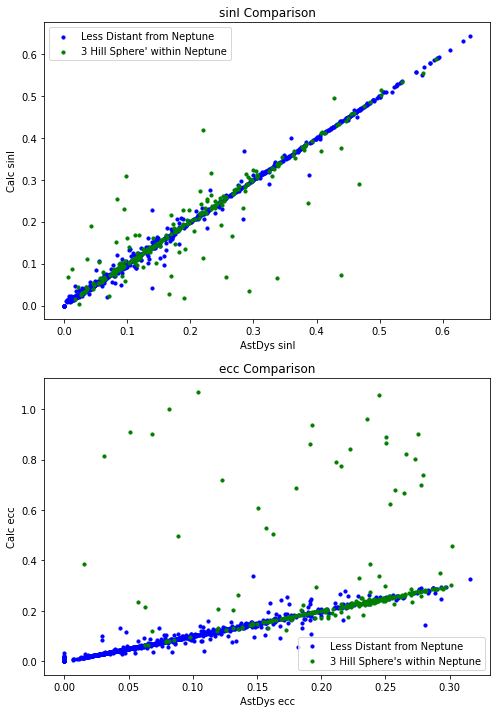

In [84]:
prop_elem = pd.read_csv('prop_elem_tnos_merc.csv')

astsini1 = prop_elem['ast_sinI'][far_ind]
calcsini1 = prop_elem['calc_sinI'][far_ind]
astsini2 = prop_elem['ast_sinI'][close_ind]
calcsini2 = prop_elem['calc_sinI'][close_ind]

aste1 = prop_elem['ast_ecc'][far_ind]
calce1 = prop_elem['calc_ecc'][far_ind]
aste2 = prop_elem['ast_ecc'][close_ind]
calce2 = prop_elem['calc_ecc'][close_ind]

print(len(prop_elem))
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
fig,ax = plt.subplots(2,figsize=(8,12))
ax0 = ax[0].scatter(astsini1,calcsini1,s=10,c='b',label='Less Distant from Neptune')
ax0 = ax[0].scatter(astsini2,calcsini2,s=10,c='g',label='3 Hill Sphere\' within Neptune')

ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')
ax[0].legend()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35

ax0 = ax[1].scatter(aste1,calce1,s=10,c='b',label='Less Distant from Neptune')
ax0 = ax[1].scatter(aste2,calce2,s=10,c='g',label='3 Hill Sphere\'s within Neptune')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
ax[1].legend()
#ax[1].set_ylim(0,0.4)
#plt.gca().set_aspect('equal')
plt.show()

0.012335038278919472
0.7561455903679055
            Name  mag.      a(AU)         e      sinI n(deg/yr)     g("/y)  \
0          15760  7.10  43.980109  0.070356  0.043997  1.237778   0.417884   
1          15789  6.95  39.458334  0.184154  0.101916  1.456473  -0.916329   
2          15807  7.35  43.798207  0.072977  0.033014  1.245505   0.501449   
3          15809  7.64  42.328679  0.220231  0.224428  1.310848  -0.486295   
4          15810  7.71  39.460954  0.124711  0.059918  1.456372  -2.008044   
...          ...   ...        ...       ...       ...       ...        ...   
1181  2015 RS245  8.22  40.418790  0.098893  0.268945  1.404816   0.406734   
1182   2015 UK84  6.81  49.611299  0.247131  0.380083  1.033066   0.114719   
1183   2016 BP81  6.06  43.726579  0.064597  0.061642  1.248466   0.520000   
1184   2016 FP59  5.78  46.636875  0.160455  0.090706  1.133517   0.337515   
1185   2016 FW59  6.08  43.433848  0.076211  0.142732  1.261196   0.388558   

        s("/yr)  LCEx1E

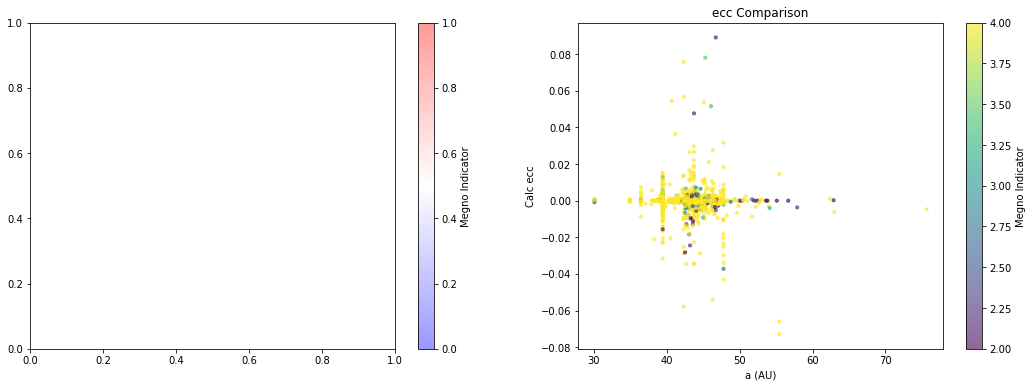

In [275]:
rms_inc = np.mean((prop_elem['calc_sinI']**2 - prop_elem['ast_sinI']**2)/prop_elem['ast_sinI'])
print(rms_inc)

rms_ecc = np.mean((prop_elem['calc_ecc']**2 - prop_elem['ast_ecc']**2)/prop_elem['ast_ecc'])
print(rms_ecc)

print(astdys)

prop_elem = pd.read_csv('data_files/prop_elem_tnos_wh.csv')
prop_megno = pd.read_csv('data_files/prop_elem_tnos.csv')
prop_megno = prop_megno.drop(ind[0])
fig,ax = plt.subplots(1,2,figsize=(18,6))
print(len(astdys),len(prop_elem))
#ax0 = ax[0].scatter(astdys['a(AU)'],prop_elem['calc_sinI']-prop_elem['ast_sinI'],s=10,c=prop_megno['megno'])
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])

fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
#ax[0].set_title('sinI Comparison')
#ax[0].set_xlabel('a (AU)')
#ax[0].set_ylabel('Calc sinI')
#ax[0].set_xlim(np.min(astdys['a(AU)']),60)

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
ax1 = ax[1].scatter(astdys2['a(AU)'],prop_elem20['ast_ecc']-prop_elem20['calc_ecc'],s=10,c=prop_megno['megno'],alpha=0.6,vmin=2,vmax=4)

fig.colorbar(ax1,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('a (AU)')
ax[1].set_ylabel('Calc ecc')
#plt.clim(2,10)
#ax[1].set_xlim(np.min(astdys['a(AU)'])-1,60)
#plt.gca().set_aspect('equal')
plt.show()


0.012335038278919472
0.7561455903679055
            Name  mag.      a(AU)         e      sinI n(deg/yr)     g("/y)  \
0          15760  7.10  43.980109  0.070356  0.043997  1.237778   0.417884   
1          15789  6.95  39.458334  0.184154  0.101916  1.456473  -0.916329   
2          15807  7.35  43.798207  0.072977  0.033014  1.245505   0.501449   
3          15809  7.64  42.328679  0.220231  0.224428  1.310848  -0.486295   
4          15810  7.71  39.460954  0.124711  0.059918  1.456372  -2.008044   
...          ...   ...        ...       ...       ...       ...        ...   
1181  2015 RS245  8.22  40.418790  0.098893  0.268945  1.404816   0.406734   
1182   2015 UK84  6.81  49.611299  0.247131  0.380083  1.033066   0.114719   
1183   2016 BP81  6.06  43.726579  0.064597  0.061642  1.248466   0.520000   
1184   2016 FP59  5.78  46.636875  0.160455  0.090706  1.133517   0.337515   
1185   2016 FW59  6.08  43.433848  0.076211  0.142732  1.261196   0.388558   

        s("/yr)  LCEx1E

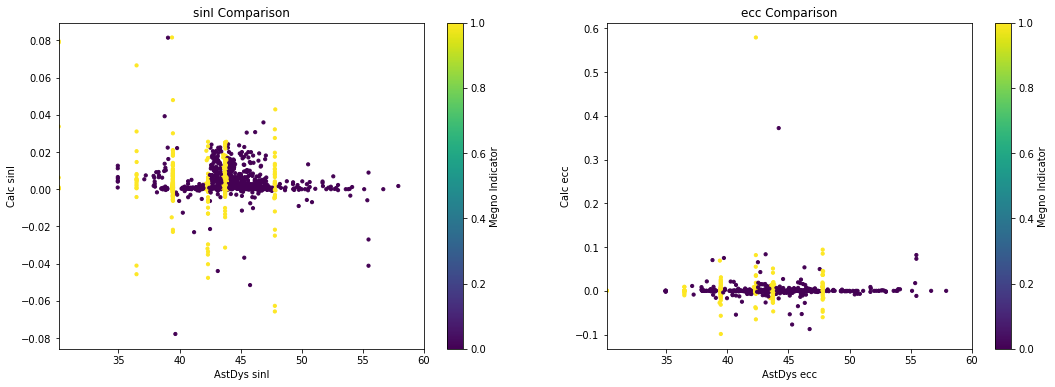

In [216]:
rms_inc = np.mean((prop_elem['calc_sinI']**2 - prop_elem['ast_sinI']**2)/prop_elem['ast_sinI'])
print(rms_inc)

rms_ecc = np.mean((prop_elem['calc_ecc']**2 - prop_elem['ast_ecc']**2)/prop_elem['ast_ecc'])
print(rms_ecc)

print(astdys)

prop_elem = pd.read_csv('data_files/prop_elem_tnos_wh.csv')
prop_megno = pd.read_csv('data_files/prop_elem_tnos.csv')
fig,ax = plt.subplots(1,2,figsize=(18,6))
print(len(astdys),len(prop_elem))
ax0 = ax[0].scatter(astdys['a(AU)'],prop_elem['calc_sinI']-prop_elem['ast_sinI'],s=10,c=resonant)
#plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=20,c=prop_elem['lyapunov'])

fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')
ax[0].set_xlim(np.min(astdys['a(AU)']),60)

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
ax1 = ax[1].scatter(astdys['a(AU)'],prop_elem['calc_ecc']-prop_elem['ast_ecc'],s=10,c=resonant)

fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
ax[1].set_xlim(np.min(astdys['a(AU)']),60)
#plt.gca().set_aspect('equal')
plt.show()


1186 1186


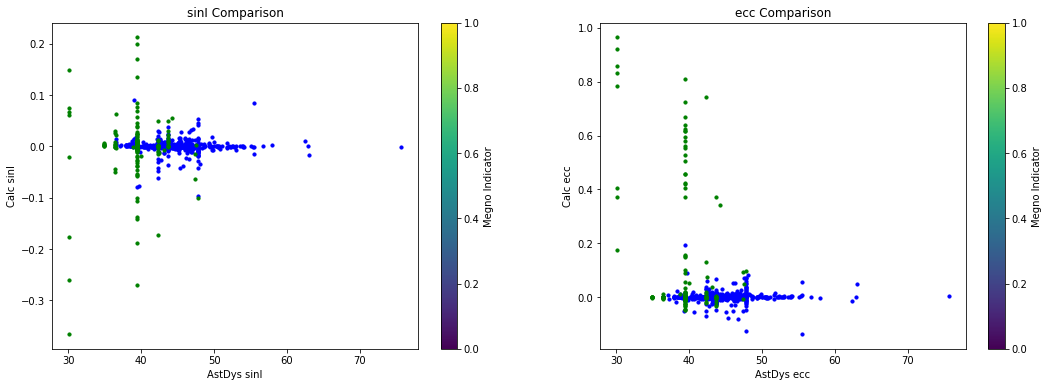

In [79]:
prop_elem = pd.read_csv('prop_elem_tnos_merc.csv')
fig,ax = plt.subplots(1,2,figsize=(18,6))
print(len(astdys),len(prop_elem))
ax0 = ax[0].scatter(astdys['a(AU)'][far_ind],prop_elem['calc_sinI'][far_ind]-prop_elem['ast_sinI'][far_ind],s=10,c='b')
ax0 = ax[0].scatter(astdys['a(AU)'][close_ind],prop_elem['calc_sinI'][close_ind]-prop_elem['ast_sinI'][close_ind],s=10,c='g')


fig.colorbar(ax0,ax=ax[0],label='Megno Indicator')
ax[0].set_title('sinI Comparison')
ax[0].set_xlabel('AstDys sinI')
ax[0].set_ylabel('Calc sinI')

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
ax1 = ax[1].scatter(astdys['a(AU)'][far_ind],prop_elem['calc_ecc'][far_ind]-prop_elem['ast_ecc'][far_ind],s=10,c='b')
ax1 = ax[1].scatter(astdys['a(AU)'][close_ind],prop_elem['calc_ecc'][close_ind]-prop_elem['ast_ecc'][close_ind],s=10,c='g')

fig.colorbar(ax0,ax=ax[1],label='Megno Indicator')
#plt.gca().set_aspect('equal')
ax[1].set_title('ecc Comparison')
ax[1].set_xlabel('AstDys ecc')
ax[1].set_ylabel('Calc ecc')
#plt.gca().set_aspect('equal')
plt.show()

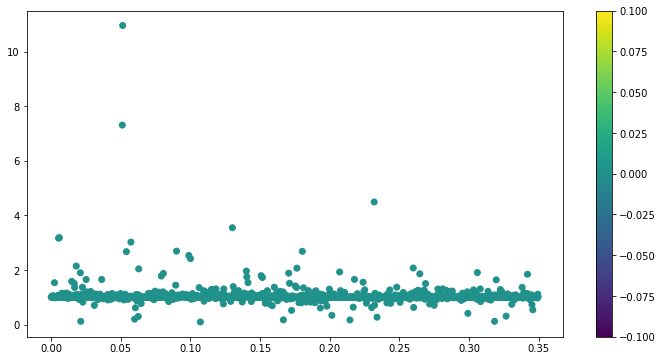

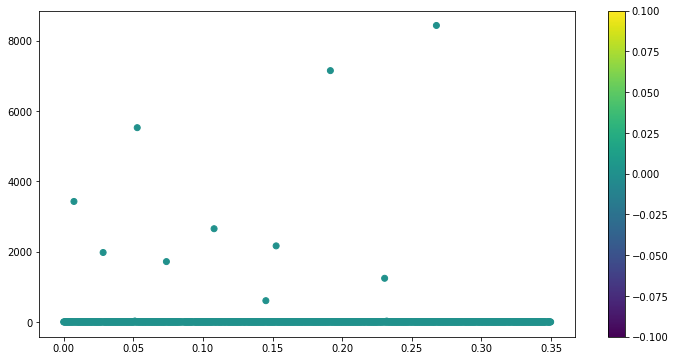

In [71]:
frac_inc = prop_elem['calc_sinI']/prop_elem['ast_sinI']
frac_ecc = prop_elem['calc_ecc']/prop_elem['ast_ecc']

plt.figure(figsize=(12,6))
#plt.scatter(data,frac_inc,c=prop_elem['megno'])
plt.scatter(data,frac_inc,c=prop_elem['lyapunov'])
plt.colorbar()
plt.show()

plt.figure(figsize=(12,6))
#plt.scatter(data,frac_ecc,c=prop_elem['megno'])
plt.scatter(data,frac_ecc,c=prop_elem['lyapunov'])
plt.colorbar()
#plt.ylim(0,100)
plt.show()

In [100]:
for i in range(2):
    print(i)

0
1


9.69276388877801e+21
1571
6.70651902109739e+23 1.339953189689203e+17


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()


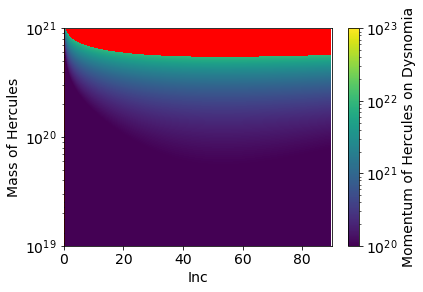

In [461]:
mh = 7.695e20
md = 7.392e19
rt = np.sqrt(ad**2+ah**2-2*ah*ad*np.cos(0.7/180*np.pi))
U_val = G*mh/(ad-ah)/1000

ang = np.arccos((rt**2+ad**2-ah**2)/2/rt/ad)
#print(ang*np.pi/180)
torque_val = U_val*np.sin(ang)*mh
print(torque_val)


ad = 37250
ah = 12400
inc = np.arange(0,np.pi/2,0.001)
mh = np.logspace(19,21,len(inc))

print(len(inc))
md = 5e18
G = 6.673e-11

from matplotlib.colors import LogNorm

r = np.sqrt(ad**2+ah**2-2*ah*ad*np.cos(inc)) #Distance array produced from inclination values
theta = np.arccos((r**2+ad**2-ah**2)/2/r/ad) # Produced from inclination values

torque = np.zeros((len(mh),len(mh)))
for i in range(len(inc)):
    Fr = G*mh[i]**2/r/1000
    torque[i] = Fr*np.sin(theta)
print(np.max(torque),np.min(torque[:,1:]))


masked_array = np.ma.masked_where(torque >= torque_val, torque)
# Can be any colormap that you want after the cm
import matplotlib
cmap = matplotlib.cm.viridis
cmap.set_bad(color='red')
plt.imshow(masked_array,norm=LogNorm(vmin=1e20, vmax=1e23),origin='lower',extent=[0,np.max(inc)*180/np.pi,np.min(mh),np.max(mh)],aspect='auto')
plt.yscale('log')
plt.xlabel('Inc')
plt.ylabel('Mass of Hercules')
cbar = plt.colorbar()
cbar.set_label('Momentum of Hercules on Dysnomia')

In [483]:
print((ad**3/(9))**(1/3))

17907.932164650312
